In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/100-bird-species/train"
test_ds="/kaggle/input/100-bird-species/test"
validation_ds="/kaggle/input/100-bird-species/valid"

# Data preprocessing
****

In [3]:
os.listdir('/kaggle/input/100-bird-species/train')

['DALMATIAN PELICAN',
 'BLACK BREASTED PUFFBIRD',
 'WATTLED CURASSOW',
 'AMERICAN WIGEON',
 'CARMINE BEE-EATER',
 'GAMBELS QUAIL',
 'UMBRELLA BIRD',
 'AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'BLUE GROSBEAK',
 'PALM NUT VULTURE',
 'DUSKY LORY',
 'AUCKLAND SHAQ',
 'BLACK THROATED WARBLER',
 'YELLOW CACIQUE',
 'STRIPPED SWALLOW',
 'VERMILION FLYCATHER',
 'CAPE MAY WARBLER',
 'RED TAILED HAWK',
 'GURNEYS PITTA',
 'INDIAN ROLLER',
 'SNOW GOOSE',
 'GREEN WINGED DOVE',
 'AZURE TANAGER',
 'GREEN MAGPIE',
 'BANDED BROADBILL',
 'AFRICAN PYGMY GOOSE',
 'INDIGO FLYCATCHER',
 'GREY PLOVER',
 'TOUCHAN',
 'HYACINTH MACAW',
 'HARLEQUIN DUCK',
 'ABYSSINIAN GROUND HORNBILL',
 'CALIFORNIA QUAIL',
 'BALD IBIS',
 'WOOD THRUSH',
 'RUBY THROATED HUMMINGBIRD',
 'INDIGO BUNTING',
 'ALBERTS TOWHEE',
 'SORA',
 'HOODED MERGANSER',
 'ROSEATE SPOONBILL',
 'CAPE ROCK THRUSH',
 'BLUE COAU',
 'CALIFORNIA CONDOR',
 'BORNEAN PHEASANT',
 'BARN SWALLOW',
 'TAIWAN MAGPIE',
 'SPLENDID WREN',
 'RED BILLED TROPICBIRD',
 'B

In [4]:
batch_size=32
img_size=224

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [7]:
img= train_generator[0]
print(img)

(array([[[[0.6313726 , 0.5686275 , 0.50980395],
         [0.6313726 , 0.5686275 , 0.50980395],
         [0.6313726 , 0.5686275 , 0.50980395],
         ...,
         [0.6111264 , 0.56014603, 0.4974009 ],
         [0.61111015, 0.56012976, 0.49738464],
         [0.60946256, 0.5568295 , 0.49133503]],

        [[0.6313726 , 0.5686275 , 0.50980395],
         [0.6313726 , 0.5686275 , 0.50980395],
         [0.6313726 , 0.5686275 , 0.50980395],
         ...,
         [0.6117647 , 0.56078434, 0.49803925],
         [0.6117647 , 0.56078434, 0.49803925],
         [0.61152154, 0.56054115, 0.49449584]],

        [[0.6314493 , 0.5687042 , 0.50988066],
         [0.6314493 , 0.5687042 , 0.50988066],
         [0.6314493 , 0.5687042 , 0.50988066],
         ...,
         [0.6118623 , 0.5608819 , 0.4981368 ],
         [0.6116951 , 0.5607147 , 0.4979696 ],
         [0.61175257, 0.5607722 , 0.49472687]],

        ...,

        [[0.50980395, 0.46274513, 0.40784317],
         [0.50980395, 0.46274513, 0.40784317

In [8]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [9]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 525)


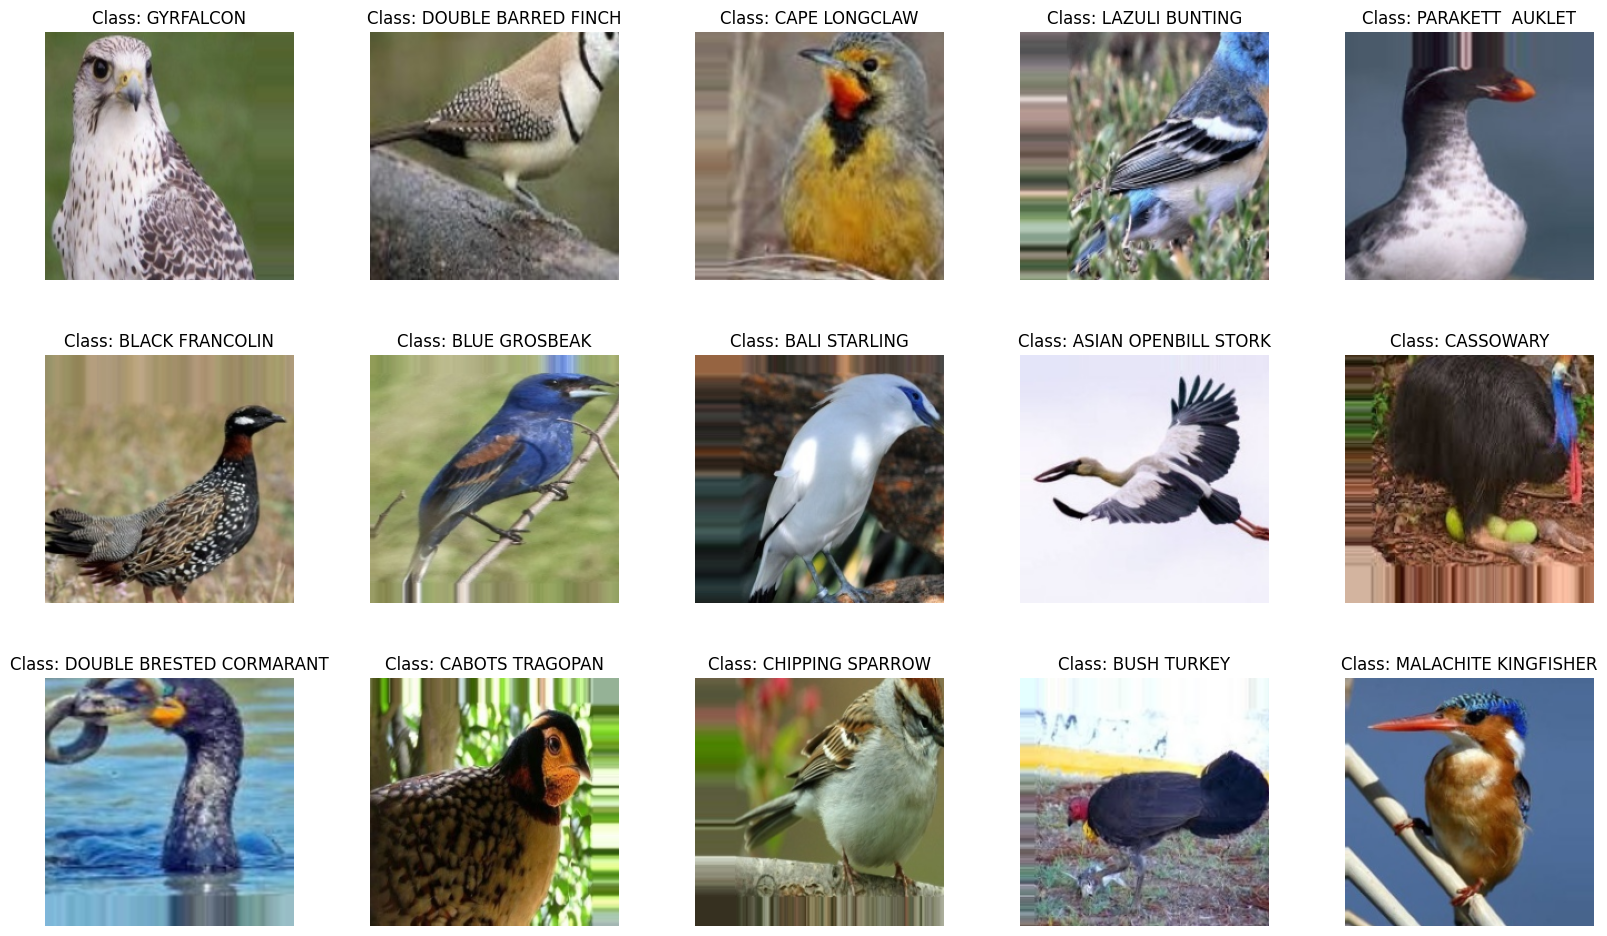

In [10]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [11]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

2645
35
36


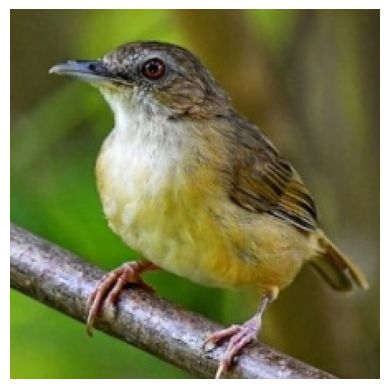

In [12]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/100-bird-species/test/ABBOTTS BABBLER/3.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
from keras.layers import MaxPool2D

In [14]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build VVG_19 Model

In [15]:
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(525, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [16]:
model = VGG19((224, 224, 3))

#   Model summary

In [17]:
# Print the model summary

model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
history =model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
2645/2645 [==============================] - 1833s 685ms/step - loss: 6.1343 - accuracy: 0.0041 - val_loss: 5.8956 - val_accuracy: 0.0099
Epoch 2/20
2645/2645 [==============================] - 1541s 582ms/step - loss: 5.8472 - accuracy: 0.0102 - val_loss: 5.4961 - val_accuracy: 0.0259
Epoch 3/20
2645/2645 [==============================] - 1521s 575ms/step - loss: 5.5866 - accuracy: 0.0206 - val_loss: 4.9802 - val_accuracy: 0.0579
Epoch 4/20
2645/2645 [==============================] - 1513s 572ms/step - loss: 5.2944 - accuracy: 0.0356 - val_loss: 4.4949 - val_accuracy: 0.1139
Epoch 5/20
2645/2645 [==============================] - 1528s 578ms/step - loss: 5.0180 - accuracy: 0.0575 - val_loss: 4.2035 - val_accuracy: 0.1653
Epoch 6/20
2645/2645 [==============================] - 1516s 573ms/step - loss: 4.7299 - accuracy: 0.0847 - val_loss: 3.7388 - val_accuracy: 0.2244
Epoch 7/20
2645/2645 [==============================] - 1516s 573ms/step - loss: 4.4590 - accuracy: 0.1134

In [21]:
n_categories = len(os.listdir('/kaggle/input/100-bird-species/valid'))# number of categories print(n_categories)

In [22]:
n_categories

525

In [23]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,6.134300,0.004076,5.895610,0.009905
1,5.847178,0.010185,5.496058,0.025905
2,5.586608,0.020618,4.980150,0.057905
3,5.294357,0.035576,4.494907,0.113905
4,5.017968,0.057506,4.203485,0.165333


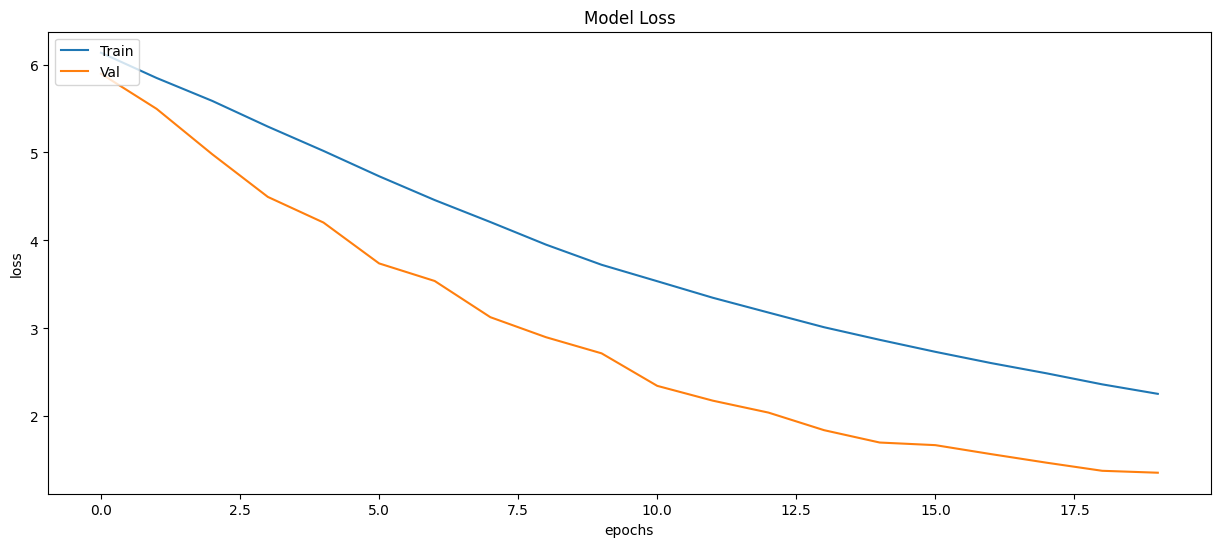

In [24]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

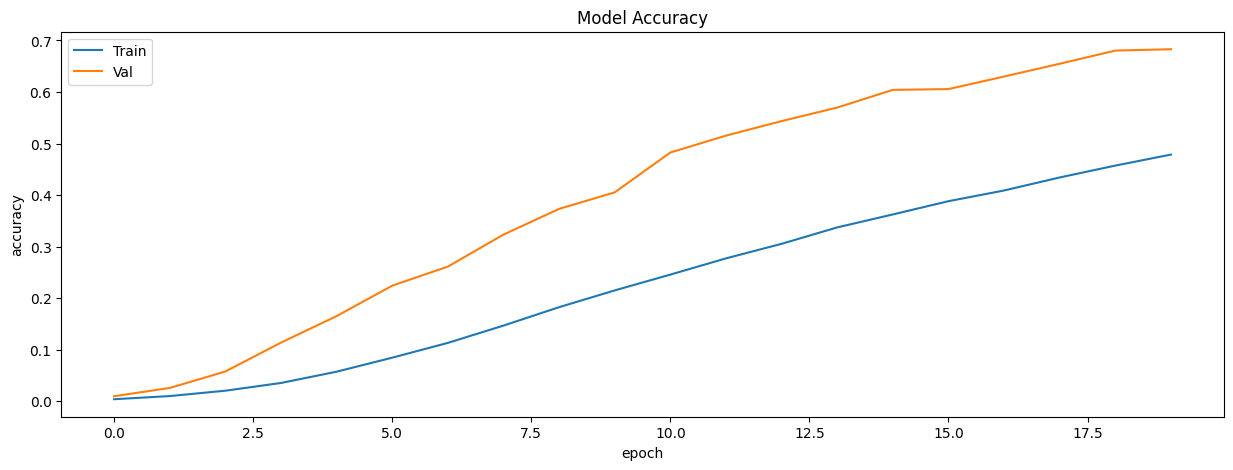

In [25]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [26]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

83/83 [==============================] - 14s 162ms/step


In [27]:
results =model.evaluate(test_generator)

83/83 [==============================] - 14s 168ms/step - loss: 1.3591 - accuracy: 0.6830


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         5
           2       1.00      0.60      0.75         5
           3       0.80      0.80      0.80         5
           4       1.00      0.80      0.89         5
           5       1.00      0.80      0.89         5
           6       1.00      0.60      0.75         5
           7       0.00      0.00      0.00         5
           8       0.80      0.80      0.80         5
           9       0.80      0.80      0.80         5
          10       1.00      0.60      0.75         5
          11       0.75      0.60      0.67         5
          12       0.67      0.40      0.50         5
          13       0.67      0.40      0.50         5
          14       1.00      0.80      0.89         5
          15       0.50      0.40      0.44         5
          16       0.75      0.60      0.67         5
          17       0.40    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 2s 2s/step


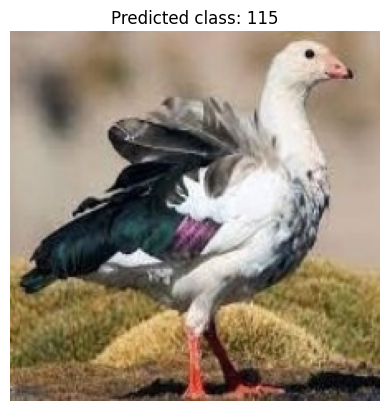

In [29]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/100-bird-species/valid/ANDEAN GOOSE'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [30]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : BULWERS PHEASANT
Class probability: 0.5087575
Predicted class for 2.jpg : ANDEAN GOOSE
Class probability: 0.92133015
Predicted class for 3.jpg : ANDEAN GOOSE
Class probability: 0.98913354
Predicted class for 4.jpg : ANDEAN GOOSE
Class probability: 0.5700472
Predicted class for 5.jpg : ABBOTTS BOOBY
Class probability: 0.27734125


# Thank You !